In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
df = pd.read_csv("C:/Users/Friederike/Desktop/Ironhack/5_WEEK/DAY1/Lab1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


#### Part 1: Analyzing Best-Seller Trends Across Product Categories


In [242]:
### 1. Crosstab Analysis - calculating absolute numbers
# Create a crosstab between the product category and the isBestSeller status.

ct = pd.crosstab(df['category'], df['isBestSeller'])
ct_sorted = ct.sort_values(by=True, ascending=False)
ct_sorted

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [17]:
# 1. Crosstab Analysis - calculating proportions
# Are there categories where being a best-seller is more prevalent?

ct2 = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
ct2_sorted = ct2.sort_values(by=True, ascending=False)
ct2_sorted

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


- The three categories with most bestsellers by proportion are: Grocery, Smart Home Security & Lighting, Health & Personal Care.

In [244]:
# 2. Statistical Tests - Chi-square test
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency

chi2_stat, chi2_pvalue, _, _ = chi2_contingency(ct, correction = False)
print(f"Test statistic: {chi2_stat}")
print(f"p-value: {chi2_pvalue}")


Test statistic: 36540.20270061387
p-value: 0.0


In [246]:
# 2. Statistical Tests - Cramér's V 
# Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats.contingency import association

cramers_v = association(ct, method="cramer")
print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.1222829439760564


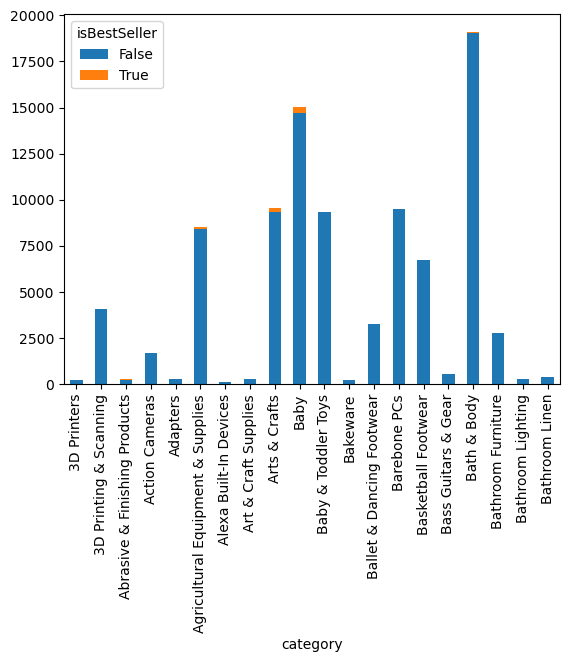

In [12]:
# 3. Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

ct_20 = ct.head(20)
ct_20.plot(kind="bar", stacked=True);

# Nice to have: order bars by highest proportion of 

In [248]:
# 3. Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
# Stacked bar charts by proportion (Bestseller - True/False)


ct2_sorted_20 = ct2_sorted.head(20)
ct2_sorted_20.plot(kind="bar", stacked=True);

# Nice to have: add title + move legend to right side

NameError: name 'ct2_sorted' is not defined

#### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [14]:
# 0. Preliminary Step: Remove outliers in product prices
# Create function to identify outliers
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [16]:
# Remove outliers
df_price = df['price']
outliers = tukeys_test_outliers(df_price)
df_price_cleaned = df.iloc[~outliers.index,:] # ~ = NOT
df_price_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [250]:
# 1. Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories. 
# Filter out the top 20 categories based on count for better visualization.

top_20_categories = df_price_cleaned.groupby('category').size().sort_values(ascending=False).head(20)
print(top_20_categories)

df_top_20_categories = df_price_cleaned.loc[df_price_cleaned['category'].isin(top_20_categories.index)]
print(df_top_20_categories['category'].nunique())
df_top_20_categories

category
Sports & Outdoors                         129862
Bath & Body                                 9548
Camera & Photo Accessories                  7118
Handmade Clothing, Shoes & Accessories      6487
Fragrances                                  6238
Luggage and travel gear                     5934
Binoculars, Telescopes & Optics             5869
Printers & Accessories                      4779
Portable Sound & Video Products             4715
Home Cinema, TV & Video                     4213
Smartwatches                                3953
Basketball Footwear                         3833
Make-up                                     3771
Motorbike Electrical & Batteries            3725
Grocery                                     3551
3D Printing & Scanning                      3148
Surveillance Cameras                        3066
Furniture & Lighting                        2907
Manicure & Pedicure Products                2698
Electronic Toys                             2675
dtype: int6

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2397667,2768047,B0979CQ5PG,PUGONGYING Popular Fit For 10 Pieces Artist D ...,0.0,0,20.47,False,0,3D Printing & Scanning
2397658,2768035,B0BZQ9SZ8F,APAAZO Premium CR10 Heater Block MK8 Silicone ...,0.0,0,11.40,False,0,3D Printing & Scanning
2397657,2768030,B0C4TZSWXF,APAAZO All Metal Bi-Metal Heatbreak Compatible...,0.0,0,10.93,False,0,3D Printing & Scanning
2397656,2767992,B09FF1T63C,PUGONGYING Popular 10 Pcs/lot Brass Nozzles Ex...,0.0,0,23.23,False,0,3D Printing & Scanning
...,...,...,...,...,...,...,...,...,...
82179,89499,B01LCSZXUK,PROtastic Industrial Strength ORIGINAL Black T...,4.4,461,8.69,False,0,Sports & Outdoors
82178,89498,B09RKDRP22,GoPro Enduro Rechargeable Battery (HERO11 Blac...,4.6,1525,24.99,False,0,Sports & Outdoors
82177,89497,B07768BFPY,"LONDON FAB Waterproof Chest Mount, Harness, St...",4.4,2187,9.99,False,200,Sports & Outdoors
82176,89496,B00R4YCKIK,Amazon Basics Head Strap Camera Mount for GoPr...,4.5,10955,9.61,False,0,Sports & Outdoors


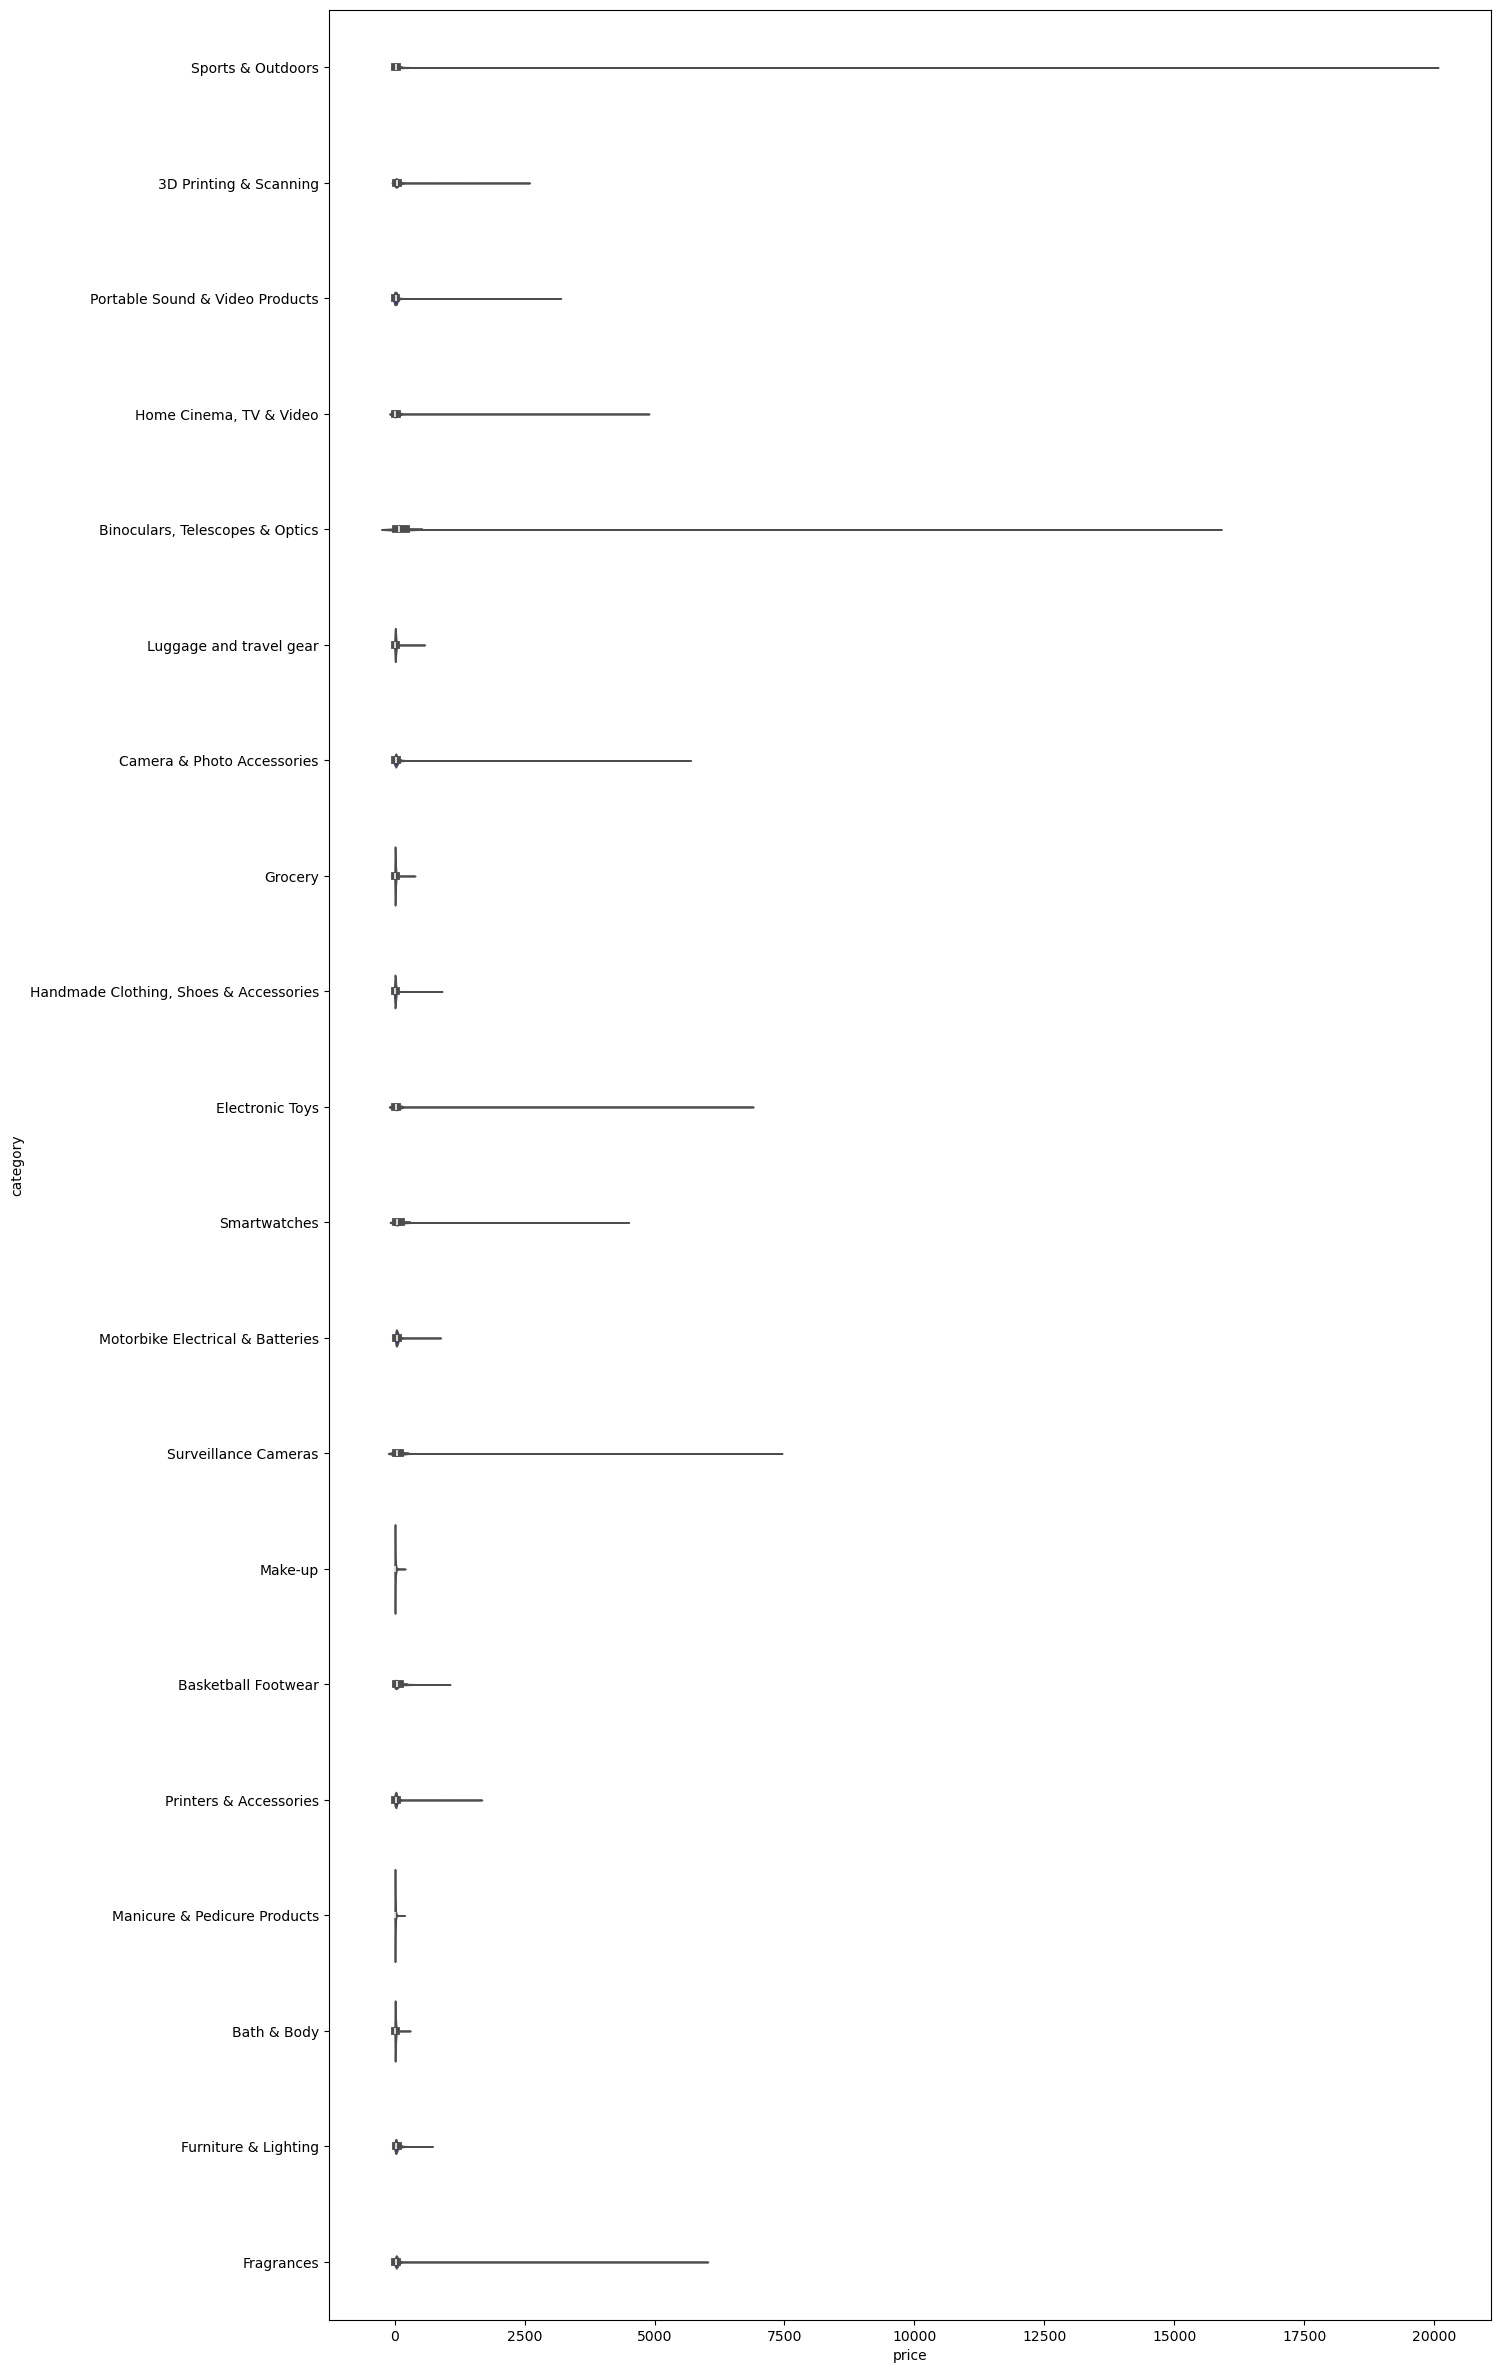

In [103]:
# Violin plot
plt.figure(figsize=(15,30))
sns.violinplot(data=df_top_20_categories, y='category', x='price', color='blue');

In [252]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
df_price_category = df_price_cleaned.groupby('category').size().sort_values(ascending=False).head(20)
print(df_price_category)

#category with highest median
category_max_median = df_price_cleaned.groupby('category')['price'].median().sort_values(ascending=False).agg(['idxmax', 'max'])
category_max_median

category
Sports & Outdoors                         129862
Bath & Body                                 9548
Camera & Photo Accessories                  7118
Handmade Clothing, Shoes & Accessories      6487
Fragrances                                  6238
Luggage and travel gear                     5934
Binoculars, Telescopes & Optics             5869
Printers & Accessories                      4779
Portable Sound & Video Products             4715
Home Cinema, TV & Video                     4213
Smartwatches                                3953
Basketball Footwear                         3833
Make-up                                     3771
Motorbike Electrical & Batteries            3725
Grocery                                     3551
3D Printing & Scanning                      3148
Surveillance Cameras                        3066
Furniture & Lighting                        2907
Manicure & Pedicure Products                2698
Electronic Toys                             2675
dtype: int6

idxmax    Digital Cameras
max                1524.0
Name: price, dtype: object

.

In [230]:
### 2. Bar Charts:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

# Filter out top 10 categories by count 
top_10_categories = df_price_cleaned.groupby('category').size().sort_values(ascending=False).head(10)

# Filter dataframe based on top 10 categories
df_top_10_categories = df_price_cleaned.loc[df_price_cleaned['category'].isin(top_10_categories.index)]
print(df_top_10_categories['category'].nunique())
df_top_10_categories

10


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2397649,2767914,B0CCYYLJC8,G.I.G.A. DX Women's Quilted Hood/Functional Ve...,0.0,0,96.43,False,0,Sports & Outdoors
2397644,2767909,B0CGLPZFV1,Dynafit Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,159.29,False,0,Sports & Outdoors
2397643,2767908,B0CGLQD1V7,Dynafit Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,160.00,False,0,Sports & Outdoors
2397642,2767907,B0CGLQNP3T,Dynafit Women's Mezzalama PTC Alpha VST W Vest...,0.0,0,161.72,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
82179,89499,B01LCSZXUK,PROtastic Industrial Strength ORIGINAL Black T...,4.4,461,8.69,False,0,Sports & Outdoors
82178,89498,B09RKDRP22,GoPro Enduro Rechargeable Battery (HERO11 Blac...,4.6,1525,24.99,False,0,Sports & Outdoors
82177,89497,B07768BFPY,"LONDON FAB Waterproof Chest Mount, Harness, St...",4.4,2187,9.99,False,200,Sports & Outdoors
82176,89496,B00R4YCKIK,Amazon Basics Head Strap Camera Mount for GoPr...,4.5,10955,9.61,False,0,Sports & Outdoors


In [200]:
# Create pivot table to display average price of top 10 categories 
top_10_categories_avg_price_table = pd.pivot_table(
    data = df_top_10_categories, 
    values = 'price', 
    index = 'category', 
    aggfunc= 'mean')
top_10_categories_avg_price_table = top_10_categories_avg_price_table.sort_values(by='price', ascending=False).head(10)
top_10_categories_avg_price_table

,price
category,
"Binoculars, Telescopes & Optics",255.746974
Sports & Outdoors,98.561179
"Home Cinema, TV & Video",80.105075
Printers & Accessories,50.135985
Camera & Photo Accessories,49.997685
Fragrances,40.094859
Portable Sound & Video Products,36.659703
Luggage and travel gear,24.739051
"Handmade Clothing, Shoes & Accessories",20.474577


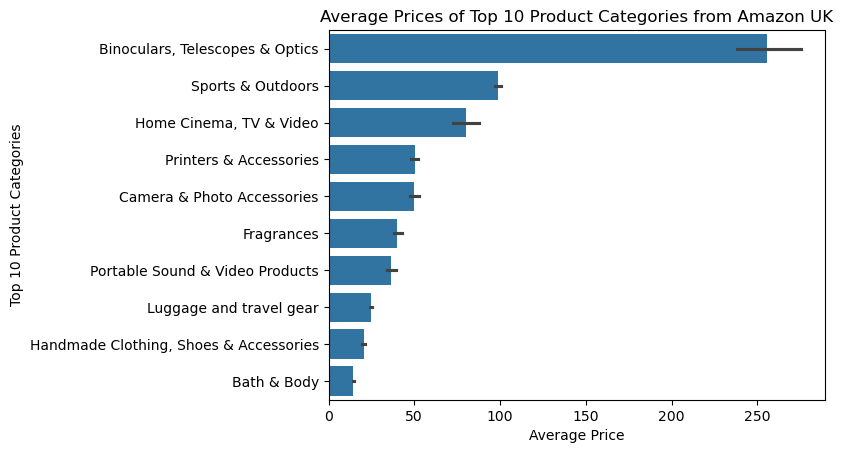

In [208]:
# Plot Bar chart of top 10 product categories

sns.barplot(data=df_top_10_categories, x='price', y='category', order=top_10_categories_avg_price_table.index)
plt.title("Average Prices of Top 10 Product Categories from Amazon UK")
plt.ylabel("Top 10 Product Categories")
plt.xlabel("Average Price");

In [254]:
# Which product category commands the highest average price? Don't filter here by top categories.

category_highest_price = df_price_cleaned.groupby('category')['price'].mean().agg(['idxmax', 'max'])
category_highest_price


idxmax    Digital Cameras
max                1524.0
Name: price, dtype: object

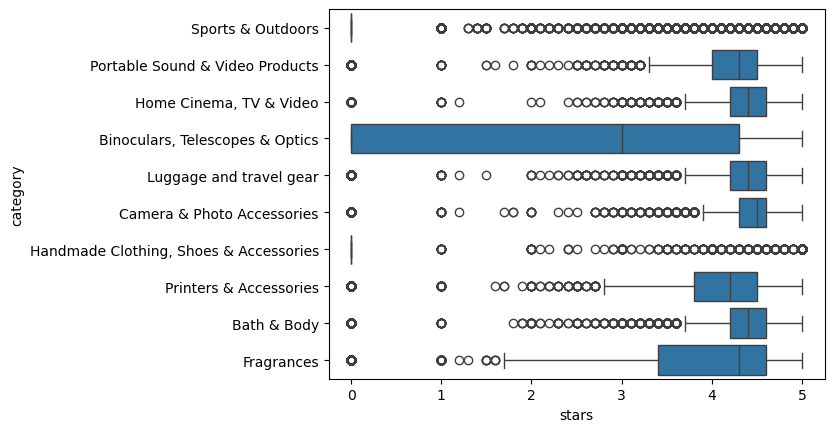

In [240]:
# 3. Box Plots:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. 
# Filter out the top 10 categories based on count for better visualization.

sns.boxplot(data=df_top_10_categories, x='stars', y='category');


In [256]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories?
category_highest_rating = df_price_cleaned.groupby('category')['stars'].median().agg(['idxmax', 'max'])
category_highest_rating


idxmax    USB Hubs
max            4.9
Name: stars, dtype: object

#### Part 3: Investigating the Interplay Between Product Prices and Ratings

In [266]:
# Correlation Coefficients:
# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?

correlation_pearson = df['price'].corr(df['stars'])
print(f"Pearson Correlation: {round(correlation_pearson, 4)}")

correlation_spearman = df['price'].corr(df['stars'], method='spearman')
print(f"Spearman Correlation: {round(correlation_spearman, 4)}")

Pearson Correlation: -0.1249
Spearman Correlation: -0.1332


- The negative correlation coefficients suggest that there is a slightly negative correlation between prices and ratings.
- That means the higher prices get, the lower ratings tend to be and vice versa.
- At the same time, the correlation coefficients of -0.12 and -0.13 suggest a rather weak correlation. 

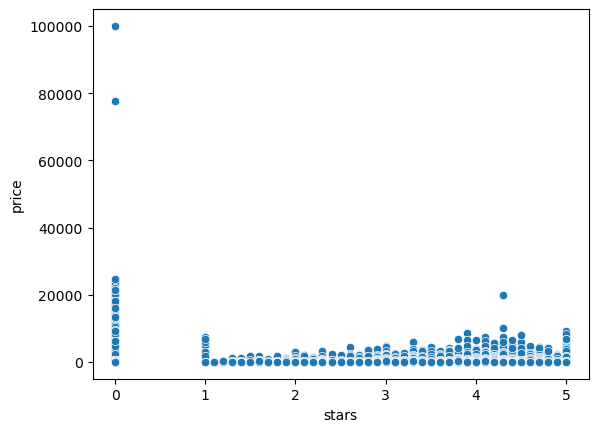

In [273]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=df, y='price', x='stars');

In [299]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
df_numerical = df.select_dtypes("number").drop(columns='uid')
df_numerical

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


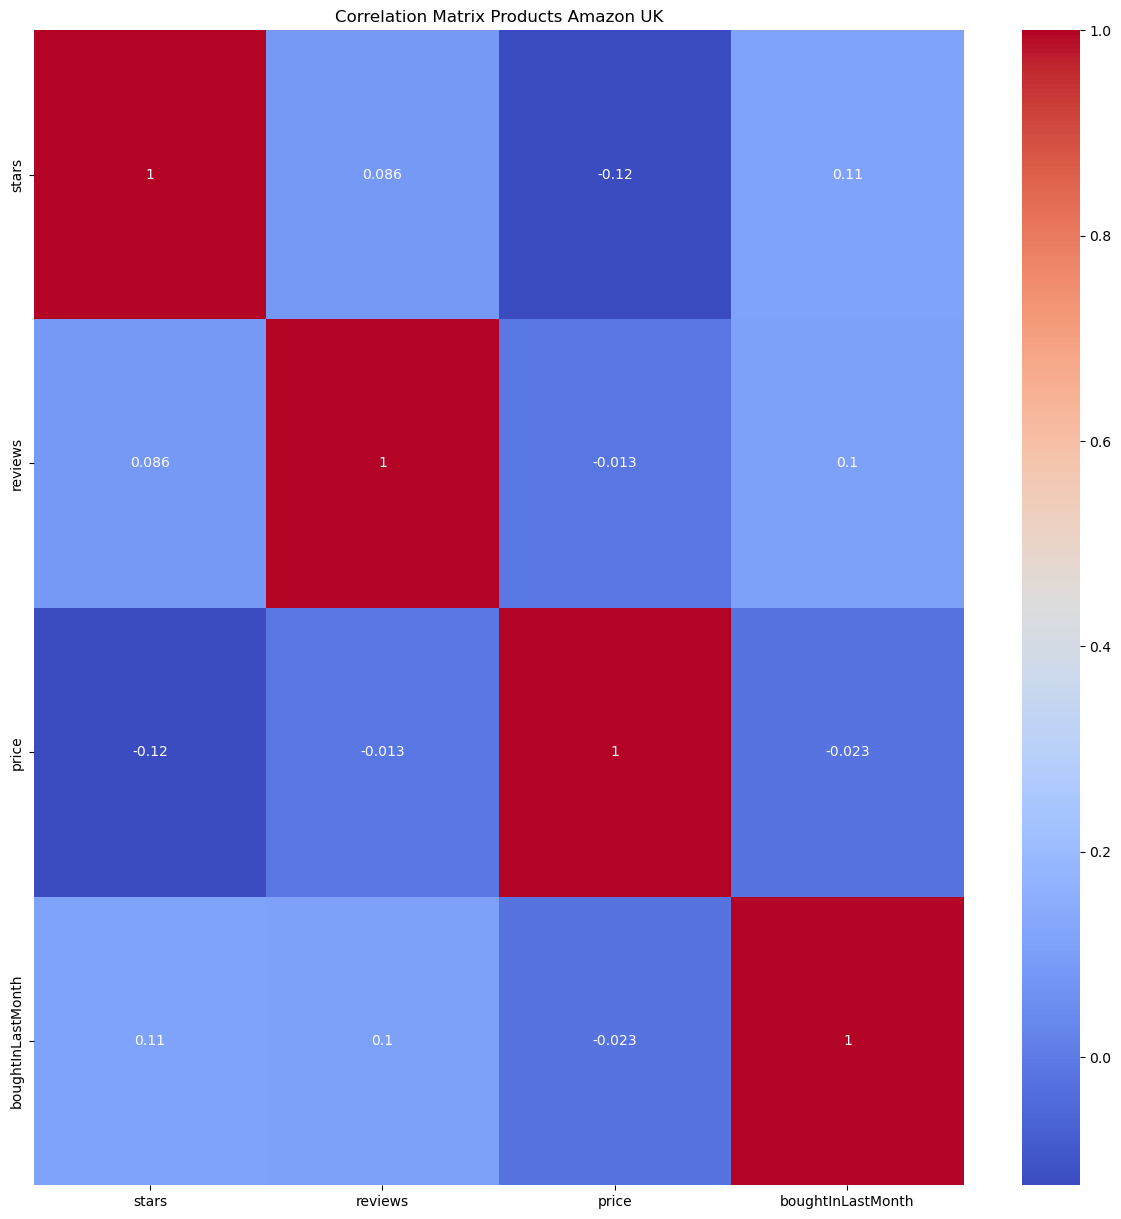

In [311]:
df_numerical_matrix = df_numerical.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=df_numerical_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Products Amazon UK");


In [ ]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
sm.qqplot(df['price'], line='s')

In [ ]:
sns.histplot(data=df['price'])

<Axes: xlabel='price', ylabel='Count'>